# Titanic : What it took to survive

## Introduction:

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

In this report, I will analyze the titanic dataset from kaggle with the aim of understanding what factors played an important role in passenger survival. I will go through the entire data science process - from posing a question to wrangling the data to the exploration phase and finally drawing conclusions. 

The dataset is available at https://www.kaggle.com/c/titanic/data.  

##        Data Wrangling:

### Importing libraries:

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Loading the data and taking a look at what the first 5 entries look like

In [121]:
data = pd.read_csv('titanic-data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### A brief description of the dataset variables:

| Variable   | Description                                                          |
|----------  |----------------------------------------------------------------------       |
| PassenegrId| The specific identification number assigned to each passenger|
| Survived   | Whether the passenger survived or not (0 = No; 1 = Yes)                                           |
| Pclass     | Ticket class,(1 = 1st; 2 = 2nd; 3 = 3rd)                          |
| Name       | Name of the passenger                                                               |
| Sex        | Passenger's sex                                                                  |
| Age        | Passenger's Age                                                                  |
| SibSp      | Number of siblings/spouses on board                                    |
| Parch      | Number of parents/children on board                                    |
| Ticket     | Passenger's ticket number                                                        |
| Fare       | Passenger's fare                                                       |
| Cabin      | Cabin number                                                                |
| Embarked   | Port of Embarkation,(C = Cherbourg; Q = Queenstown; S = Southampton) |

#### Now that we know what each variable represents, let's get some descriptive statistics on the dataset:

In [122]:
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Cleaning the data:


#### Removing misleading/incomplete inforamtion:

What I am most interested in here is finding out what specific information is unavailable for a large number of passengers. I would not want those variables to factor into my analysis since we wont have information about that specific variable for a lot of the passengers in our data.

After some trivial calculations using the counts we got from the last table, we can see that about 20% of data is missing for age and a staggering 77% of data is missing for the cabin information. 

I would like to drop the cabin information from my dataframe

In [123]:
data = data.drop('Cabin', 1)

In [124]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Succesfully dropped the cabin column

#### Replacing keys for Embarked , Survived and Pclass with actual port/class names and whethere survived or not:

In [125]:
def full_port_name(data):
    if data == "C":
        return "Cherbourg"
    elif data == "Q":
        return "Queenstown"
    elif data == "S":
        return "Southhampton"
    else:
        return data
    
data["Embarked"] = data["Embarked"].apply(full_port_name)

In [126]:
def full_class_name(data):
    if data == 1:
        return "Upper"
    elif data == 2:
        return "Middle"
    elif data == 3:
        return "Lower"
    else:
        return pclass
    
data["Pclass"] = data["Pclass"].apply(full_class_name)

In [127]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southhampton
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southhampton
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southhampton
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southhampton


Next I am going to remove some more fields that I believe, for good reason, do not contribute to the survival chances of a person. Name and Ticket fields seem to check the box here since someone's name and ticket number can surely not affect their survival.

In [128]:
data = data.drop('Name', 1)
data = data.drop('Ticket', 1)

In [129]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,Lower,male,22.0,1,0,7.2500,Southhampton
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg
2,3,1,Lower,female,26.0,0,0,7.9250,Southhampton
3,4,1,Upper,female,35.0,1,0,53.1000,Southhampton
4,5,0,Lower,male,35.0,0,0,8.0500,Southhampton


In [130]:
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Lower,male,NaN,NaN,NaN,NaN,Southhampton
freq,NaN,NaN,491,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


We can see that there still exists sosme missing information. There are 2 missing fields in Embarked and 177 missing Age fields. We are going to fill these missing values in or ignore the data that does not exist. Since only 2 Embarked fields are missing it doesn't make much of a difference what we fill the fields with but I will fill it with the most recurring value. For age. I will fill not fill up the missing values because the only way that makes sense is using the mean in all the missing places but replacing those values with the mean can affect our outlook of the problem

In [131]:
data['Embarked'] = data.Embarked.fillna('Southhampton')
data.describe(include ='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Lower,male,NaN,NaN,NaN,NaN,Southhampton
freq,NaN,NaN,491,577,NaN,NaN,NaN,NaN,646
mean,446.000000,0.383838,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


The data is in a much more promising condition now so we can start the analysis phase

## Analysis:

### Survival By Gender

Let's take a look at what the survival data looks like for males vs females:

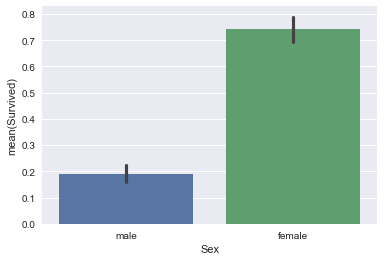

In [161]:
sns.barplot(x="Sex", y="Survived", data=data);

The bar charts show clear evidence that gender played an important role here. Let's come back to this in each of the sections below

### Survival By Age:

I would like to look at passengers' ages by their survival type so I am going to write two methods to group the data into two different categories - survived and did not survive - based on the attributes

In [136]:
def survived_group(data, attrib):
    survived = data[data['Survived'] == 1][attrib].dropna()
    return survived

In [137]:
def non_survived_group(data, attrib):
    non_survived = data[data['Survived'] == 0][attrib].dropna()
    return non_survived

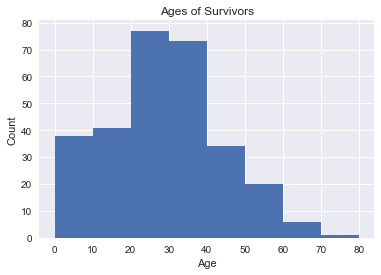

In [138]:
survived_ages = survived_group(data, 'Age')
plt.hist(survived_ages.values, bins=np.arange(0,90,10), histtype = 'bar')
plt.title('Ages of Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
#survived_ages

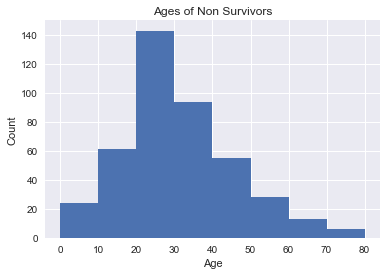

In [139]:
non_survived_ages = non_survived_group(data, 'Age')
plt.hist(non_survived_ages.values, bins=np.arange(0,90,10))
plt.title('Ages of Non Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

The only age group with more survivors than non survivors is the 0-10 year age group. Apart from that it seems like age did not play a significant role in survival on its own. Perhaps coupled with some other attricute we can make better deductions. For now, we know that there was a better chance for survival if you were aged between 0-10 which means children were sent off the boat first.

Let's create a new field in our data that has all the passengers put into age groups as well

In [158]:
bins =  np.arange(0,100,10)
group_by_age = pd.cut(data['Age'], bins)
group_by_age = group_by_age.to_frame(name="Age_Group")
data['Age_Group'] = group_by_age['Age_Group']
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,1,0,Lower,male,22.0,1,0,7.2500,Southhampton,"(20, 30]"
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg,"(30, 40]"
2,3,1,Lower,female,26.0,0,0,7.9250,Southhampton,"(20, 30]"
3,4,1,Upper,female,35.0,1,0,53.1000,Southhampton,"(30, 40]"
4,5,0,Lower,male,35.0,0,0,8.0500,Southhampton,"(30, 40]"


In [159]:
class_data = data.groupby('Age_Group')['Survived']
class_data.describe()

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
"(0, 10]",64.0,0.593750,0.495015,0.0,0.0,1.0,1.0,1.0
"(10, 20]",115.0,0.382609,0.488151,0.0,0.0,0.0,1.0,1.0
"(20, 30]",230.0,0.365217,0.482541,0.0,0.0,0.0,1.0,1.0
"(30, 40]",155.0,0.445161,0.498595,0.0,0.0,0.0,1.0,1.0
"(40, 50]",86.0,0.383721,0.489143,0.0,0.0,0.0,1.0,1.0
"(50, 60]",42.0,0.404762,0.496796,0.0,0.0,0.0,1.0,1.0
"(60, 70]",17.0,0.235294,0.437237,0.0,0.0,0.0,0.0,1.0
"(70, 80]",5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
"(80, 90]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets have some visual representation of this

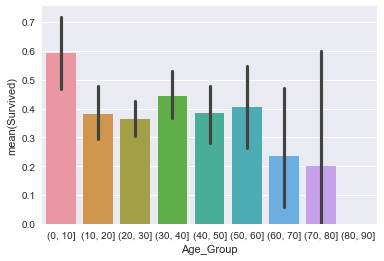

In [160]:
sns.barplot(x="Age_Group", y="Survived", data=data);

This confirms my above hypothesis that the 0-10 age group has the highest survival rate ~ 60%

Now let's take a look at what this data looks like for different genders

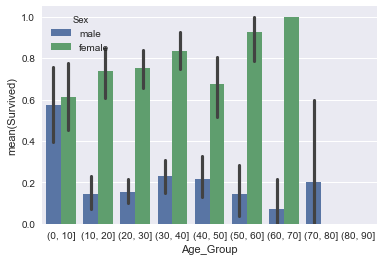

In [172]:
sns.barplot(x="Age_Group", y="Survived", hue = "Sex", data=data);

There was little difference between survival rates of boys aged 10 or less and girls aged 10 or less. Other than that female survival rate is staggeringly high for all other age groups

### Survival By Passenger Class :

Let's group the survival data by passenger class and see what happens: 

In [156]:
class_data = data.groupby('Pclass')['Survived']
class_data.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
Lower,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0
Middle,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
Upper,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0


The result looks interesting. The better your travelling class was the higher chances you had for survival. Lets plot this out and see what the result looks like.

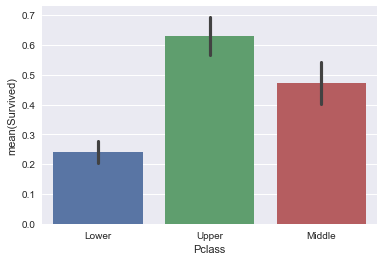

In [149]:
sns.barplot(x="Pclass", y="Survived", data=data);

Lets see what the result looks like for men vs women

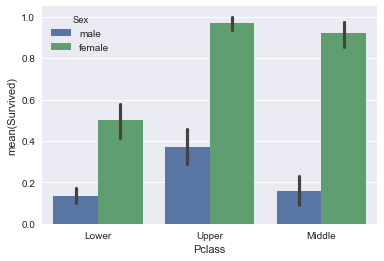

In [170]:
sns.barplot(x="Pclass", y="Survived", hue = 'Sex', hue = "Age_Group", data=data);

What's interesting here is that lower class men and middle class men had almost the same survival rate but the rate of survival was drastically different for lower class women vs middle class women